In [31]:
from astropy.table import QTable, Table, join, vstack
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from astropy import constants as c
from astropy import units as u
import numpy as np
from glob import glob
from synphot import SpectralElement, units
from astropy.io import fits

import warnings
warnings.filterwarnings('ignore')

plt.style.use('paper')

In [2]:
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/' 
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 

t_uvis_f555w = Table.read('%s/HST_WFC3_UVIS1.F555W.dat' %rootdir_bp, format='ascii')
t_uvis_f657n = Table.read('%s/HST_WFC3_UVIS1.F657N.dat' %rootdir_bp, format='ascii')
t_uvis_f658n = Table.read('%s/HST_WFC3_UVIS1.F658N.dat' %rootdir_bp, format='ascii')
t_uvis_f814w = Table.read('%s/HST_WFC3_UVIS1.F814W.dat' %rootdir_bp, format='ascii')

t_acs_f555w = Table.read('%s/HST_ACS_WFC.F555W.dat' %rootdir_bp, format='ascii')
t_acs_f658n = Table.read('%s/HST_ACS_WFC.F658N.dat' %rootdir_bp, format='ascii')
t_acs_f814w = Table.read('%s/HST_ACS_WFC.F814W.dat' %rootdir_bp, format='ascii')

t_sample = Table.read('%s/sample_table/phangs_sample_table_v1p6.fits' %rootdir)

In [13]:
# Load the MUSE table
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/'
muscat_table_file = '%s/data_misc/Nebulae_catalogue_v4/Nebulae_catalogue_v4.fits' %root_dir
table_muse = QTable.read(muscat_table_file)

mask_flags = ~((table_muse['flag_edge']==1)|(table_muse['flag_star']==1))
table_muse = table_muse[mask_flags] 
table_muse

gal_name,region_ID,cen_x,cen_y,cen_ra,cen_dec,cen_x_geo,cen_y_geo,flag_edge,flag_nearby,flag_star,deproj_dist,deproj_phi,region_area,region_circ_rad,HB4861_FLUX,OIII5006_FLUX,HA6562_FLUX,NII6583_FLUX,SII6716_FLUX,SII6730_FLUX,SIII9068_FLUX,OI6300_FLUX,NII5754_FLUX,HEI5875_FLUX,SIII6312_FLUX,OI6363_FLUX,OII7319_FLUX,OII7330_FLUX,HB4861_FLUX_ERR,OIII5006_FLUX_ERR,HA6562_FLUX_ERR,NII6583_FLUX_ERR,SII6716_FLUX_ERR,SII6730_FLUX_ERR,SIII9068_FLUX_ERR,OI6300_FLUX_ERR,NII5754_FLUX_ERR,HEI5875_FLUX_ERR,SIII6312_FLUX_ERR,OI6363_FLUX_ERR,OII7319_FLUX_ERR,OII7330_FLUX_ERR,HA6562_SIGMA,NII6583_SIGMA,OIII5006_SIGMA,HA6562_VEL,NII6583_VEL,OIII5006_VEL,HA6562_SIGMA_ERR,NII6583_SIGMA_ERR,OIII5006_SIGMA_ERR,HA6562_VEL_ERR,NII6583_VEL_ERR,OIII5006_VEL_ERR,HB4861_FLUX_CORR,OIII5006_FLUX_CORR,HA6562_FLUX_CORR,NII6583_FLUX_CORR,SII6716_FLUX_CORR,SII6730_FLUX_CORR,SIII9068_FLUX_CORR,OI6300_FLUX_CORR,NII5754_FLUX_CORR,HEI5875_FLUX_CORR,SIII6312_FLUX_CORR,OI6363_FLUX_CORR,OII7319_FLUX_CORR,OII7330_FLUX_CORR,HB4861_FLUX_CORR_ERR,OIII5006_FLUX_CORR_ERR,HA6562_FLUX_CORR_ERR,NII6583_FLUX_CORR_ERR,SII6716_FLUX_CORR_ERR,SII6730_FLUX_CORR_ERR,SIII9068_FLUX_CORR_ERR,OI6300_FLUX_CORR_ERR,NII5754_FLUX_CORR_ERR,HEI5875_FLUX_CORR_ERR,SIII6312_FLUX_CORR_ERR,OI6363_FLUX_CORR_ERR,OII7319_FLUX_CORR_ERR,OII7330_FLUX_CORR_ERR,EBV,EBV_ERR,met_scal,met_scal_err,logq_D91,logq_D91_err,BPT_NII,BPT_SII,BPT_OI,LOG_SIGMA_SFR_CHAB,LOG_SIGMA_STMASS_CHAB,5thNN_dist,NN_number,Environment,r_R25,r_reff,Lum_HA6562_CORR,Delta_met_scal,pc_per_pixel,EW_HA6562,EW_HA6562_ERR,EW_HB4861,EW_HB4861_ERR,HII_class_v2,HII_class_v3,FLAG_NII5754,FLAG_SIII6312,FLAG_OII7320,FLAG_OII7330,TEM_NII,TEM_NII_ERR,TEM_SIII,TEM_SIII_ERR
,,pix,pix,deg,deg,pix,pix,,,,arcsec,rad,,,erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),,,erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),mag,mag,mag,mag,,,,,,,,solMass / (yr kpc2),solMass / kpc2,pc,,,,,erg / s,,pc,,,,,,,,,,,K,K,K,K
bytes32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64
IC5332,1.0,171.02772359655975,704.6159545401293,353.6217889985926,-36.086205660984305,171.03125,704.625,0.0,0.0,0.0,62.173817616424884,0.6454405340574735,32.0,0.6383076486422924,1539.2341650021465,1219.0416061730582,4121.1986373108,1476.084225361972,792.9254230583941,553.7915648041692,0.0,409.1388314208345,229.7551303677294,635.8871036386854,149.21333940358426,137.61597823948375,0.0,495.4897835077406,72.04334579496953,67.78753986403167,6

In [4]:
def get_bandpassinfo(files):

    files.sort()

    bp = {}
    for file in files:

        print(file)

        area = 45238.93416 * units.AREA  # HST
        bp_ = SpectralElement.from_file(file)
        name = file.split('/')[-1].split('.dat')[0].replace('HST_', '').replace('.F', '_F')
        name = name.replace('WFC_', '')
        name = name.replace('WFC3_', '')
        name = name.replace('UVIS1', 'UVIS')

        bp[name] = {'equivwidth': bp_.equivwidth().value, 
                    'integrate': bp_.integrate().value, 
                    'rmswidth': bp_.rmswidth().value, 
                    'photbw': bp_.photbw().value, 
                    'fwhm': bp_.fwhm().value, 
                    'rectwidth': bp_.rectwidth().value, 
                    'pivot': bp_.pivot().value, 
                    'unit_response': bp_.unit_response(area).value}  
    
    return(bp)

files_bp = glob('%s*.dat' %rootdir_bp)
bp = get_bandpassinfo(files_bp)
bp.keys()

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F550M.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F555W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F658N.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_ACS_WFC.F814W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F555W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F657N.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F658N.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS1.F814W.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS2.F547M.dat
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/HST_WFC3_UVIS2.F673N.dat


dict_keys(['ACS_F550M', 'ACS_F555W', 'ACS_F658N', 'ACS_F814W', 'UVIS_F555W', 'UVIS_F657N', 'UVIS_F658N', 'UVIS_F814W', 'UVIS2_F547M', 'UVIS2_F673N'])

In [5]:
keys = list(bp.keys())
unit_response = [bp[key]['unit_response']/1e-19 for key in keys]
pivot = [bp[key]['pivot'] for key in keys]
rectwidth = [bp[key]['rectwidth'] for key in keys]

filter = [key.split('_')[0] for key in keys]
instr = [key.split('_')[-1] for key in keys]

t1 = Table.Column(filter, 'Filter')
t2 = Table.Column(instr, 'Instrument')
t3 = Table.Column(unit_response, 'photflam', unit=1e-19/(u.erg/u.s/u.cm**2/u.AA))
t4 = Table.Column(pivot, 'photplam', unit=u.AA)
t5 = Table.Column(rectwidth, 'photbw', unit=u.AA)

t_filters = Table([t1,t2,t3,t4,t5])
t_filters.write('%s/filter_table.fits'%rootdir_bp, overwrite=True)
t_filters.write('%s/filter_table.tex'%rootdir_bp, format='latex', formats={'photflam': '%0.3f', 'photplam': '%0.1f', 'photbw': '%0.1f'}, overwrite=True)

In [52]:
t_sample = Table.read('data/galaxy_filters.txt', format='ascii')
t_sample['velocity'].unit = u.km/u.s
t_sample['reshift'] = (((t_sample['velocity'].quantity/c.c.to('km/s')) * 6564.614) + 6564.614) * u.AA
t_sample.sort('reshift')
t_sample

galaxy,velocity,filter,reshift
,km / s,,Angstrom
str9,int64,str10,float64
NGC 628-C,657,F658N ACS,6579.000457307075
NGC 628-E,657,F658N WFC3,6579.000457307075
NGC 5068,670,F658N WFC3,6579.285120845875
IC 5332,701,F658N WFC3,6579.963933899938
NGC 3627,722,F658N WFC3,6580.423775001077
NGC 3351,779,F658N WFC3,6581.671915132742
NGC 2835,887,F658N WFC3,6584.036812224315
NGC 1512,898,F658N WFC3,6584.277681372531


In [53]:
min_vel = []
max_vel = []
for i, gal_name in enumerate(t_sample['galaxy']):

    print(gal_name.split('-')[0].replace(' ', '').replace('628','0628'))
    gal_name_muse = gal_name.split('-')[0].replace(' ', '').replace('628','0628')

    mask_gal = table_muse['gal_name'] == gal_name_muse
    table_gal = table_muse[mask_gal]

    min_vel.append(np.nanpercentile(table_gal['HA6562_VEL'], 1))
    max_vel.append(np.nanpercentile(table_gal['HA6562_VEL'], 99))

t_sample['min_vel'] = min_vel
t_sample['max_vel'] = max_vel

t_sample['min_reshift'] = ((((t_sample['min_vel'].quantity+t_sample['velocity'].quantity)/c.c.to('km/s')) * 6564.614) + 6564.614) * u.AA
t_sample['max_reshift'] = ((((t_sample['max_vel'].quantity+t_sample['velocity'].quantity)/c.c.to('km/s')) * 6564.614) + 6564.614) * u.AA

t_sample

NGC0628
NGC0628
NGC5068
IC5332
NGC3627
NGC3351
NGC2835
NGC1512
NGC1433
NGC1672
NGC1385
NGC1566
NGC1087
NGC4303
NGC4321
NGC1300
NGC1365
NGC7496
NGC4535
NGC4254


galaxy,velocity,filter,reshift,min_vel,max_vel,min_reshift,max_reshift
,km / s,,Angstrom,km / s,km / s,Angstrom,Angstrom
str9,int64,str10,float64,float64,float64,float64,float64
NGC 628-C,657,F658N ACS,6579.000457307075,-24.266021935192732,30.999249742343356,6578.469099485791,6579.679253932599
NGC 628-E,657,F658N WFC3,6579.000457307075,-24.266021935192732,30.999249742343356,6578.469099485791,6579.679253932599
NGC 5068,670,F658N WFC3,6579.285120845875,-43.13975208922149,40.481955325806304,6578.3404812695135,6580.171562127461
IC 5332,701,F658N WFC3,6579.963933899938,-39.14391932277982,42.94221486256592,6579.106791854018,6580.90424796507
NGC 3627,722,F658N WFC3,6580.423775001077,-172.9899015670194,194.0630266812373,6576.635781342859,6584.673210995341
NGC 3351,779,F658N WFC3,6581.671915132742,-134.60999377734717,143.53802225846215,6578.724333810696,6584.814995238013
NGC 2835,887,F658N WFC3,6584.036812224315,-71.73211802929814,104.33032434293565,6582.466080027094,6586.321353711367
NGC 1512,898,F658N WFC3,6584.277681372531,-102.0285243136412,138.8253375632286,6582.043542850245,6587.31756690068


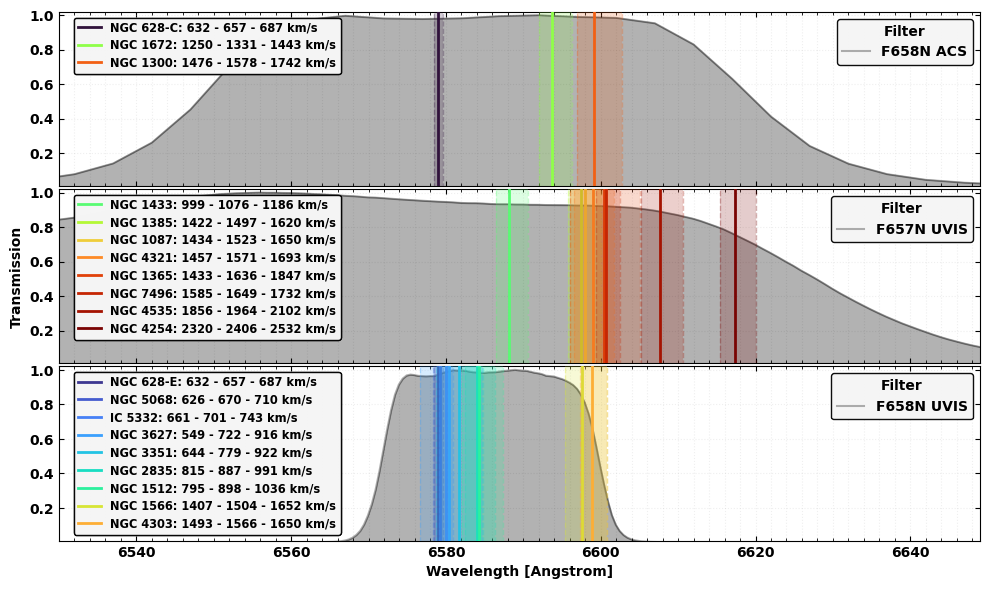

In [88]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

###
color = 'grey'
a = 0.1
a2 = 0.3

ax1.fill_between(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), alpha=a2, zorder=2, color='black')
# ax1.fill_between(t_uvis_f657n['col1'], t_uvis_f657n['col2']/t_uvis_f657n['col2'].max(), alpha=a, zorder=1, color=color)
# ax1.fill_between(t_uvis_f658n['col1'], t_uvis_f658n['col2']/t_uvis_f658n['col2'].max(), alpha=a, zorder=1, color=color)

ax1.plot(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), zorder=2, alpha=a2, color='black')
# ax1.plot(t_uvis_f657n['col1'], t_uvis_f657n['col2']/t_uvis_f657n['col2'].max(), zorder=1, alpha=a, color=color)
# ax1.plot(t_uvis_f658n['col1'], t_uvis_f658n['col2']/t_uvis_f658n['col2'].max(), zorder=1, alpha=a, color=color)

# ax2.fill_between(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), alpha=a, zorder=1, color=color)
ax2.fill_between(t_uvis_f657n['col1'], t_uvis_f657n['col2']/t_uvis_f657n['col2'].max(), alpha=a2, zorder=2, color='black')
# ax2.fill_between(t_uvis_f658n['col1'], t_uvis_f658n['col2']/t_uvis_f658n['col2'].max(), alpha=a, zorder=1, color=color)

# ax2.plot(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), zorder=1, alpha=a, color=color)
ax2.plot(t_uvis_f657n['col1'], t_uvis_f657n['col2']/t_uvis_f657n['col2'].max(), zorder=2, alpha=a2, color='black')
# ax2.plot(t_uvis_f658n['col1'], t_uvis_f658n['col2']/t_uvis_f658n['col2'].max(), zorder=1, alpha=a, color=color)

# ax3.fill_between(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), alpha=a, zorder=1, color=color)
# ax3.fill_between(t_uvis_f657n['col1'], t_uvis_f657n['col2']/t_uvis_f657n['col2'].max(), alpha=a, zorder=1, color=color)
ax3.fill_between(t_uvis_f658n['col1'], t_uvis_f658n['col2']/t_uvis_f658n['col2'].max(), alpha=a2, zorder=2, color='black')

# ax3.plot(t_acs_f658n['col1'], t_acs_f658n['col2']/t_acs_f658n['col2'].max(), zorder=1, alpha=a, color=color)
# ax3.plot(t_uvis_f657n['col1'], t_uvis_f657n['col2']/t_uvis_f657n['col2'].max(), zorder=1, alpha=a, color=color)
ax3.plot(t_uvis_f658n['col1'], t_uvis_f658n['col2']/t_uvis_f658n['col2'].max(), zorder=2, alpha=a2, color='black')
###

colors = plt.cm.turbo(np.linspace(0, 1, len(t_sample['velocity'])))
for w, w1, w2, v, v1, v2, n, f, color in zip(t_sample['reshift'].quantity.value, 
                                     t_sample['min_reshift'].quantity.value, 
                                     t_sample['max_reshift'].quantity.value, 
                                     t_sample['velocity'].quantity.value, 
                                     t_sample['min_vel'].quantity.value,
                                     t_sample['max_vel'].quantity.value,
                                     t_sample['galaxy'], 
                                     t_sample['filter'], 
                                     colors): 
    
    if f=='F658N ACS':
        ax1.fill_between([w1, w2], 0, 2, alpha=0.2, fc=color, zorder=4, ec='none')
        ax1.plot([w1, w1], [0, 2], alpha=0.3, c=color, lw=1, zorder=4, ls='--',)
        ax1.plot([w2, w2], [0, 2], alpha=0.3, c=color, lw=1, zorder=4, ls='--')
        ax1.plot([w, w], [0, 2], alpha=1, label='%s: %i - %i - %i km/s' %(n.upper(), v1+v, v, v2+v), c=color, lw=2, zorder=4)
        
    if f=='F657N WFC3':
        ax2.fill_between([w1, w2], 0, 2, alpha=0.2, fc=color, zorder=4, ec='none')
        ax2.plot([w1, w1], [0, 2], alpha=0.3, c=color, lw=1, zorder=4, ls='--')
        ax2.plot([w2, w2], [0, 2], alpha=0.3, c=color, lw=1, zorder=4, ls='--')
        ax2.plot([w, w], [0, 2], alpha=1, label='%s: %i - %i - %i km/s' %(n.upper(), v1+v, v, v2+v), c=color, lw=2, zorder=4)

    if f=='F658N WFC3':
        ax3.fill_between([w1, w2], 0, 2, alpha=0.2, fc=color, zorder=4, ec='none')
        ax3.plot([w1, w1], [0, 2], alpha=0.3, c=color, lw=1, zorder=4, ls='--')
        ax3.plot([w2, w2], [0, 2], alpha=0.3, c=color, lw=1, zorder=4, ls='--')
        ax3.plot([w, w], [0, 2], alpha=1, label='%s: %i - %i - %i km/s' %(n.upper(), v1+v, v, v2+v), c=color, lw=2, zorder=4)

filters = ["F658N ACS", "F657N UVIS", "F658N UVIS"]
for j, ax in enumerate([ax1, ax2, ax3]):

    lines = ax.get_lines()
    legend1 = ax.legend([lines[i] for i in [0]], [filters[j]], 
                        fontsize=10, loc='upper right', title='Filter',
                        facecolor='whitesmoke', framealpha=0.95, edgecolor='k')
    ax.add_artist(legend1)

    lines = ax.get_lines()[2:]
    lines = [lines[i] for i in range(len(lines))]
    labels = [lines[i].get_label() for i in range(len(lines))]
    legend2 = ax.legend(lines , labels,
                        loc='upper left', fontsize=8.2,
                        facecolor='whitesmoke', framealpha=0.95, edgecolor='k', bbox_to_anchor=(0.01, 0., 0.5, 1))
    ax.add_artist(legend2)

    ax.grid(':', alpha=0.2, which='both')

    # ax.set_xlim([6480, 6649])
    ax.set_xlim([6530, 6649])
    ax.set_ylim([0.01, 1.02])

    ax.xaxis.set_minor_locator(MultipleLocator(2))
    ax.xaxis.set_major_locator(MultipleLocator(20))

ax1.set_xticklabels([])
ax2.set_xticklabels([])

ax3.set_xlabel('Wavelength [Angstrom]')
ax2.set_ylabel('Transmission')

fig.tight_layout(h_pad=0.02)
fig.savefig('./figs/filters.pdf', dpi=300, bbox_inches='tight', transparent=True)